## Notebook 5 – Flow and pressure fields in lubrication

#### Today's exercise is to plot and interpret flow and pressure fields in lubrication.

#### _Purpose of today's exercise_

The goals are to:

* use `numpy` and `matplotlib` to visualize lubrication flow

* interpret flow physics in the gap

> **NOTE**
> 
> It may be helpful to right-click the notebook tab in JupyterLab and select "New View for Notebook" if you want to view the instructions and code cells side-by-side instead of scrolling.

> This exercise involves a lot of plotting. Please use **Notebook 4** (especially **Exercise 11**) as a guide to refresh your memory.

#### _Contents_

[**Analyze the flow field**](#flowfield)

[**Analyze the pressure field**](#pressurefield)

#### _Submission format_

Please submit the result of your exercises by 

> * Download the notebook to your computer **as a PDF (.pdf) file**.
> 
>   **File > Export notebook as... > Export notebook to PDF**
> 
> * Upload the notebook to the Jupyter Notebook 5 assignment in Moodle.

Don't forget to complete the interactive question (1) at the end before submitting.

---

**PROBLEM STATEMENT**

In class we saw the problem of a **slider bearing**. A slider bearing is an inclined block that moves over a lubricating layer of fluid that reduces friction and supports the bearing. Consider the bearing from its reference frame – so the surface is moving. The problem statement is the following.

> A block with an angled bottom is separated from a moving surface by a thin layer of fluid.
> 
> The surface is moving at constant velocity $U$.
>
> The fluid has density $\rho$ and viscosity $\mu$.
> 
> The block has length $l$. It starts at height $h_1$ and ends at height $h_2$ above the solid layer, creating an inclination angle $\alpha$.
> 
> The linear profile of the gap is given by $h(x_1)$.
> 
> **Assumptions**
> 
> Assume
> 
> * thin gap, small average height compared to length: $\frac{h_1 + h_2}{2} \ll l$
> 
> * inclination angle $\alpha$ is small: $\alpha \ll 1$.
> 
> * ``Reduced" Reynolds number ($Re$ multiplied by the aspect ratio) is small: $Re_h = \left(\frac{\rho U h}{\mu}\right) \frac{h}{l} = \frac{\rho U h^2}{\mu l} \ll 1$, where $h$ is the typical gap scale

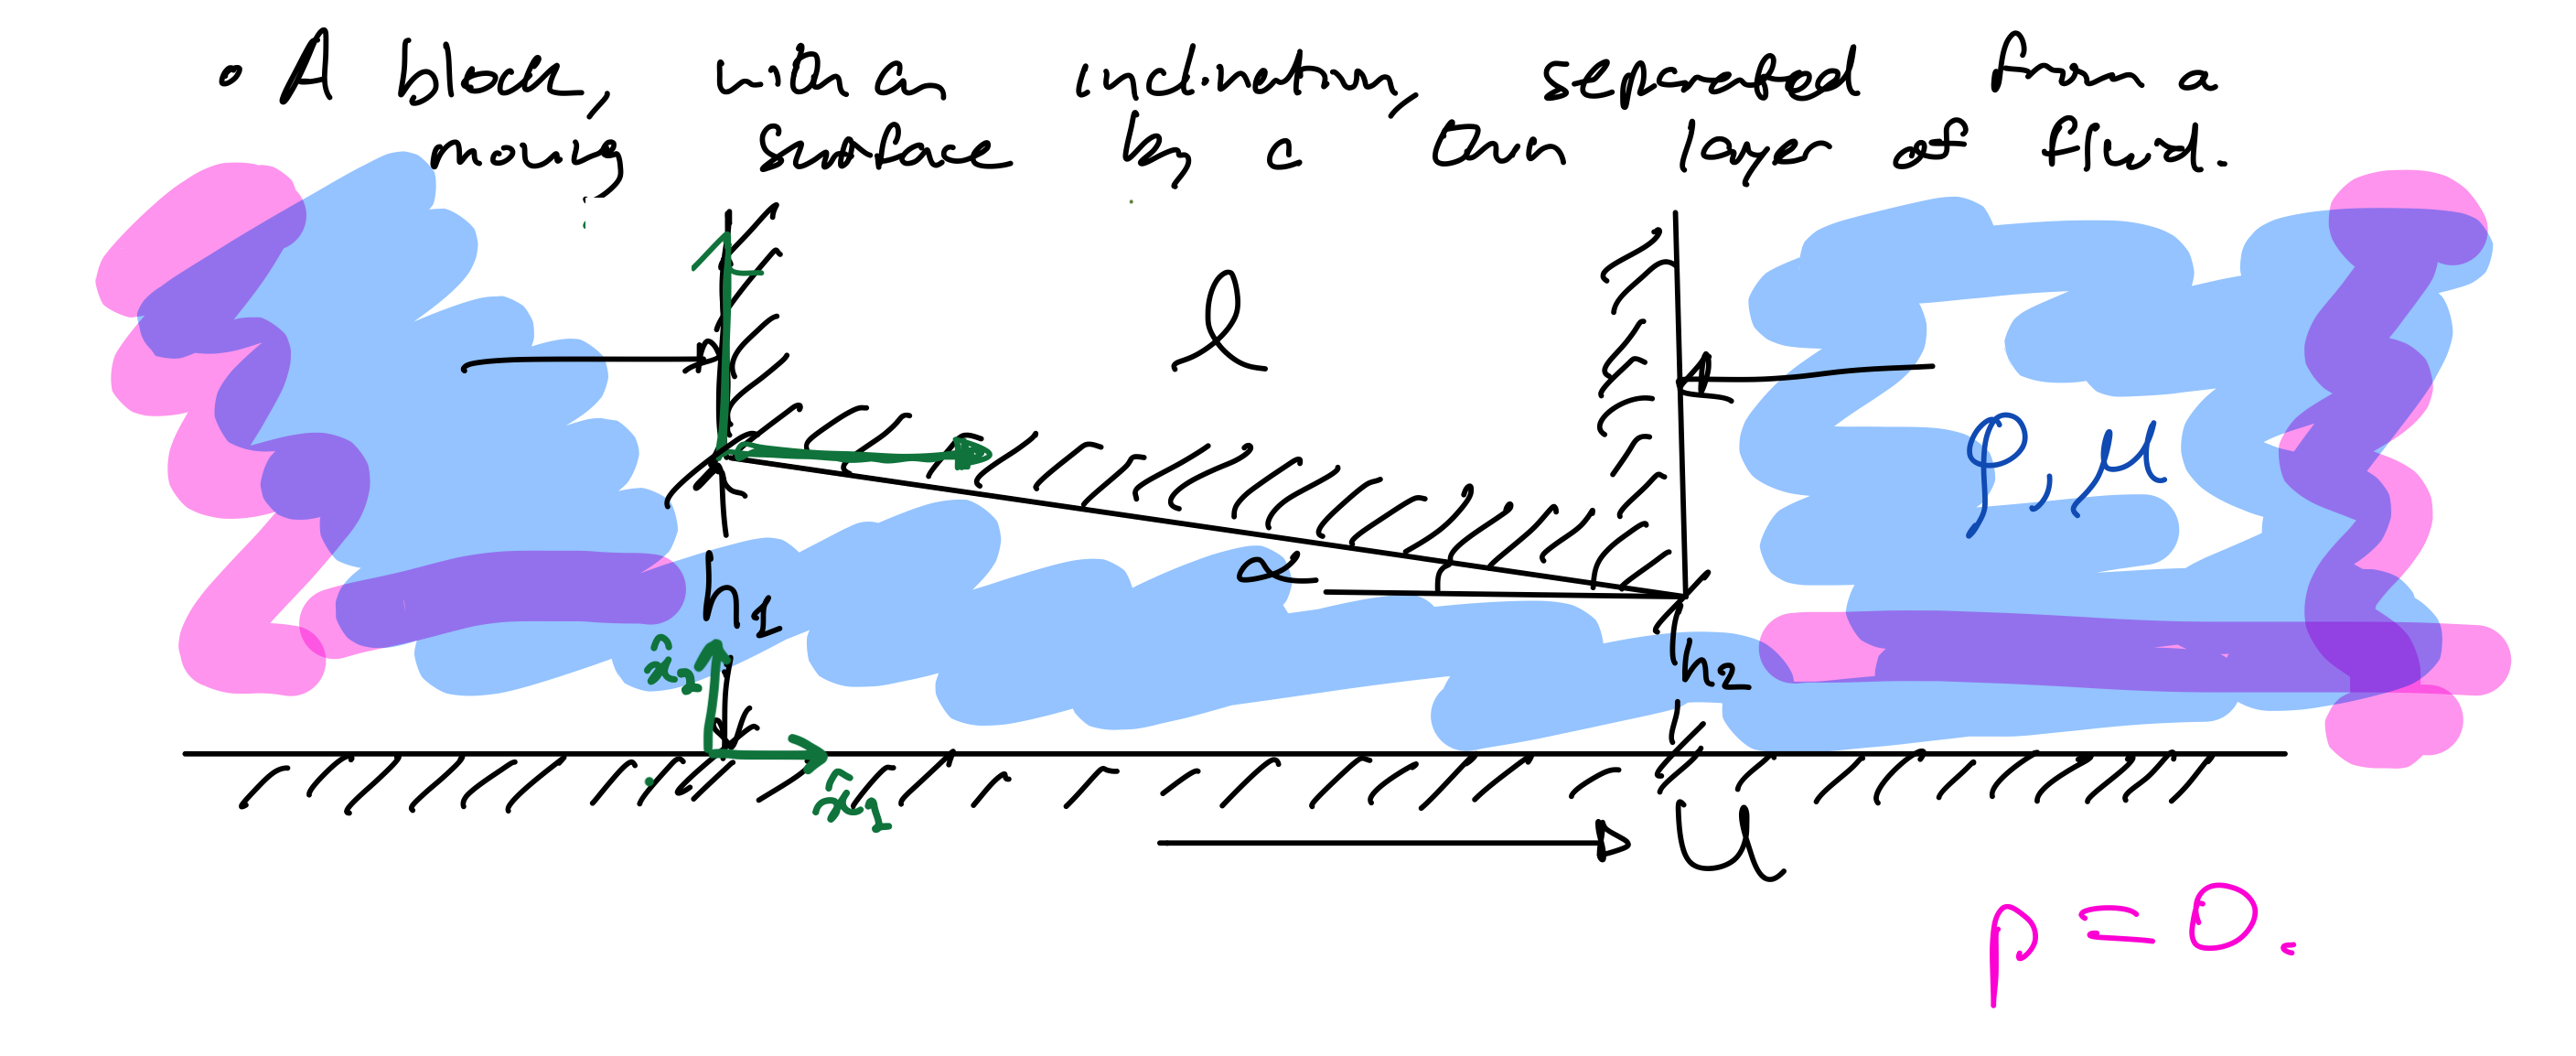

In [1]:
from IPython.display import Image
Image(filename='sliderbearing.png')

**Exercise 0**

**We will need 2 packages for this exercise.**

> Import the packages specified in the code cell below.

Import `numpy` as `np`.

Import `matplotlib.pyplot` as `plt`.

In [3]:
# your imports here


---

<a id='flowfield'><a>
### Velocity field

**Exercise 1**

In class we saw that the velocity field in the gap between a slider bearing and a solid surface is
\begin{equation*}
u_1(x_1, x_2) = \left(1 - \frac{x_2}{h(x_1)}\right) + 6 x_2 (x_2 - h(x_1)) \left(\frac{1}{2[h(x_1)]^2} - \frac{h_1 h_2}{(h_1 + h_2)[h(x_1)]^3}\right)
\end{equation*}
where $x_1$ is the direction along the slider parallel to the surface, $x_2$ is the vertical direction, and $h(x_1)$ is the linear profile of the gap, because the bearing has a small angle with respect to the surface. The beginning height is $h_1$ and the ending height is $h_2$, where $h_1 > h_2$.

**This is a nondimensional equation.** Note that $u_1$ has been normalized by velocity scale $U$, whereas the profile $h(x_1)$ and constants $h_1$, $h_2$, $x_1$, and $x_2$ have been normalized by average gap height $h_{avg} = \frac{h_1 + h_2}{2}$ or slider length $l$. For comparison to the class notes with the dimensional variables, this is the same as defining
$$
\tilde{u}_1 = \frac{u_1}{U},
$$
and
$$
\quad \tilde{h}(\tilde{x}_1) = \frac{1}{h_{avg}}h\left(\frac{x_1}{l}\right), \quad \tilde{h}_1 = \frac{h_1}{h_{avg}}, \quad \tilde{h}_1 = \frac{h_1}{h_{avg}}, \quad \tilde{h}_2 = \frac{h_2}{h_{avg}}, \quad \tilde{x}_1 = \frac{x_1}{l}, \quad \tilde{x}_2 = \frac{x_2}{l}
$$
in the equation from class and afterward dropping the tildes ($\tilde{}$) from the normalized variables.

**a)** Define a function

`u1(x1, x2, h1, h2)` or `u(x, y, h1, h2)` (whatever you wish to name it)

using

```python
def u1(x1, x2, h1, h2):
    # your code here
```

that takes inputs: **independent variables** `x1` and `x2` and **given constants** `h1` and `h2` and outputs the correct value of `u1`.

_Hint:_ Figure out the correct function $h(x_1)$ from the slider edge line between $h_1$ and $h_2$ to put in the denominator of some terms. Define a separate function `h(x1)` for this before and use it inside `u1(x1, x2, h1, h2)` (a function called in another function), like so
```python
def h(x1):
    # your function for the gap profile
    
def u1(x1, x2, h1, h2):
    # your function of the velocity field, where some terms call the function h(x1)
```
This way, you can use the function `h(x1)` repeatedly in parts below. **Make sure you follow this hint, as it is required for Exercise 1f).**

_Hint hint:_ You can put in typical values for the constants using **default arguments**. For example, writing 

```python
def u1(x1, x2, h1=1.5, h2=0.5):
``` 
will use these values for `h1` and `h2` unless specified otherwise.

**Consider some values for a slider bearing:**

> $h_1 = 1.5$
> 
> $h_2 = 0.5$
> 
> $l = 1$

**We will use these values for all subsequent parts.** Once you finish the exercise, you are welcome to play with other values of $h_1$ and $h_2$ to change the gap profile. Then re-run your code to see the difference.

**b)** Knowing that the values $h_1$, $h_2$, and $l$ given above are normalized by average gap height $h_{avg}$ or slider length $l$, **describe and interpret what each nondimensional value means.** 

Are the assumptions in the **PROBLEM STATEMENT** above satisfied?

**c)** Plot the velocity as a function of the $x$-direction by defining `x1` as a vector between `0` and `1` with `1000` steps (use `np.linspace()`), and plotting the variable 

```python
x1     # (independent variable)
``` 

versus 

```python
u1(x1, x2=..., h1=..., h2=...)     # (dependent variable)
```

where you insert the correct constant values of `h1` and `h2`. We will do this at different constant heights `x2` in the gap. **In a single graph,** plot a curve for `x2=0` (at the moving surface), then a few more curves for your choice of some evenly spaced values of `x2` until `x2=1.5`. (Why does $x_1$ go from $0$ to $1$? Should it go from $0$ to $1$ at all heights $x_2$?)

Include a relevant **plot title**, **x-axis label**, **y-axis label**, and **legend that indicates the `x2` value used for each curve plotted**.

**d)** At different heights $x_2$, what do you observe about the $u_1$ velocity component along the $x_1$-direction? **Please describe physically what this means about the fluid in the gap.**

**e)** Plot the velocity as a function of the $y$-direction similar to above. Define instead `x2` as the independent variable, a vector between `0` and `1.5` (from surface to the maximum gap thickness `h_1`) with `1000` steps (use `np.linspace()`) and plot the variable

```python
x2     # (independent variable)
``` 

versus 

```python
u1(x1=..., x2, h1=..., h2=...)     # (dependent variable)
```

where you insert the correct constant values of `h1` and `h2`. We will do this at different constant positions `x1` in the gap. **In a single plot,** plot a curve for `x1=0`, then a few more curves of your choice for evenly spaced values of `x1` until `x1=1`. (Why does $x_2$ go from $0$ to $1.5$? Does it go from $0$ to $1.5$ at all positions $x_1$?)

**f)** At different positions $x_1$, what do you observe about the $u_1$ velocity component along the $x_2$-direction? **Please describe physically what this means about the fluid in the gap.**

**g)** The slider bearing horizontal velocity field $u_1(x, y)$ is plotted for you as a `plt.contourf()` plot in 2D. **Please describe physically what this means about the fluid in the gap.**

**Is the velocity everywhere positive? Do the results match your 1D plots?**

_Hint:_ The code cell will only work if you've defined the functions `h` and `u1` correctly in part **a)**.

Use this as an example for **Exercise 2** where you are asked to plot the contour of pressure.

----

In [1]:
# a


----
**b)** ...your answer here...



----

In [2]:
# c


----
**d)** ...your answer here...

----

In [3]:
# e


----
**f)** ...your answer here...

----

In [4]:
# g

#########################################
# 2d contour plot of flow field
# Requires correct functions `h` AND `u1`
# See comments below
#########################################

x1 = np.linspace(0, 1, 1000)
x2 = np.linspace(0, 1.5, 1000)

# Create a 2D coordinate grid
X, Y = np.meshgrid(x1, x2)
# Get rid of values of x and y coordinates "within the slider bearing" where there is no fluid flow
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if Y[i][j] > h(X[i][j]):  ### THIS STEP DEPENDS ON HAVING THE CORRECT DEFINITION FOR FUNCTION `h` in PART a)
            X[i][j] = None
            Y[i][j] = None
# Make a contour plot
plt.contourf(X, Y, u1(x1=X, x2=Y), levels=13)  ### PLEASE RENAME THE FUNCTION `u1` TO WHATEVER YOU HAVE NAMED IT IN PART a)
# Plot the border of the slider bearing
plt.plot(x1, h(x1), linestyle='-', linewidth=4, color='k')
# Set axis limits
plt.axis(xmin=0, xmax=1, ymin=0, ymax=1.5)
# Add a colorbar indicating velocity
cbar = plt.colorbar()
cbar.set_label('$u_1$')
# Plot labels and title
plt.xlabel('$\hat{x}_1$')
plt.ylabel('$\hat{x}_2$')
plt.title('x-velocity below a slider bearing')
# Show plot
plt.show()

---
**g)** ...your answer here...

---

<a id='pressurefield'><a>
### Pressure field

**Exercise 2**

In class we saw that the pressure field in the gap between a slider bearing and a solid surface is
\begin{equation*}
p(x1) - p(0) = p(x1) = -\frac{h_{avg}}{l} \frac{6}{\alpha} \frac{(h_1 - h(x_1))(h(x_1) - h_2)}{(h_1 + h_2)[h(x_1)]^2}
\end{equation*}
where $x_1$ is the direction along the slider parallel to the surface, $x_2$ is the vertical direction, and $h(x_1)$ is the linear profile of the gap, because the bearing has a small angle with respect to the surface. The beginning height is $h_1$ and the ending height is $h_2$, where $h_1 > h_2$.

**As before, this is a nondimensional equation.** Note that $p$ has been normalized by an identified pressure scale $\frac{\mu U}{h_{avg}^2/l}$, whereas the profile $h(x_1)$ and constants $h_1$, $h_2$, $x_1$, and $x_2$ have been normalized by average gap height $h_{avg} = \frac{h_1 + h_2}{2}$. If you are comparing to the dimensional version from class, this is the same as defining nondimensional pressure
$$
\tilde{p} = \frac{p}{\frac{\mu U}{h_{avg}^2/l}},
$$
and
$$
\quad \tilde{h}(\tilde{x}_1) = \frac{1}{h_{avg}}h\left(\frac{x_1}{l}\right), \quad \tilde{h}_1 = \frac{h_1}{h_{avg}}, \quad \tilde{h}_1 = \frac{h_1}{h_{avg}}, \quad \tilde{h}_2 = \frac{h_2}{h_{avg}}, \quad \tilde{x}_1 = \frac{x_1}{l}, \quad \tilde{x}_2 = \frac{x_2}{l}
$$
and afterward dropping the tildes ($\tilde{}$) from the normalized variables. We'll assume the pressure scale to be of order 1,
\begin{equation*}
p = O\left(\frac{\mu U}{h_{avg}^2/l}\right) \to \tilde{p} \approx O(1).
\end{equation*}

**a)** Define a function

`p(x1, x2, h1, h2)` or `p(x, y, h1, h2)` (whatever you wish to name it)

using

```python
def p(x1, x2, h1, h2):
    # your code here
```

that takes inputs: **independent variables** `x1` and `x2` and **given constants** `h1`, and `h2` and outputs the correct value of `p`, where we take `p` to be the value $p = p(x_1) - p(0)$. Note that `alpha` is not needed if you have $h_1$ and $h_2$ inputs (from these, use a trigonometric function `np.sin()`, `np.cos()`, or `np.tan()` to find `alpha`.

_Hint:_ As before, use your function `h(x1)` from before to put in the terms inside `p(x1, x2, h1, h2)` (a function called in another function).

_Hint hint:_ You can put in typical values for the constants using **default arguments**. For example, writing 

```python
def p(x1, x2, h1=1.5, h2=0.5):
``` 
will use these values for `h1`, and `h2` unless specified otherwise.

**Consider the same values for a slider bearing as above:**
> $h_1 = 1.5$
> 
> $h_2 = 0.5$
> 
> $l = 1$

**b)** Knowing that these values are normalized by either average gap height $h_{avg}$ or slider length $l$, **describe and interpret what each nondimensional value means.** (Similar to above.)

**c)** Plot the pressure as a function of the $x$-direction by defining `x1` as a vector between `0` and `1` with `1000` steps (use `np.linspace()`), and plotting the variable 

```python
x1     # (independent variable)
``` 

versus 

```python
p(x1, x2=..., h1=..., h2=...)     # (dependent variable)
```

where you insert the correct values of `h1`, and `h2`. **In a single graph,** plot a curve for `x2=0`, then a few more curves for evenly spaced values of `x2` until `x2=1.5`. (Why does $x_1$ go from $0$ to $1$? Does it go from $0$ to $1$ at all heights $x_2$?)

Include relevant **plot title**, **x-axis label**, **y-axis label**, and **legend that indicates the `x2` value used for each curve plotted**.

**d)** At different heights $x_2$, what do you observe about the pressure $p$ along the $x_1$-direction? **Please describe physically what this means about the fluid pressure in the gap.**

**e)** Plot the pressure as a function of the $y$-direction similar to above. Define instead `x2` as the independent variable, a vector between `0` and `1.5` (from surface to the maximum gap thickness `h_1`) with `1000` steps (use `np.linspace()`) and plot the variable

```python
x2     # (independent variable)
``` 

versus 

```python
u1(x1=..., x2, h1=..., h2=...)     # (dependent variable)
```

where you insert the correct values of `h1`, and `h2`. **In a single plot,** plot a curve for `x1=0`, then a few more curves for evenly spaced values of `x1` until `x1=1`. (Why does $x_2$ go from $0$ to $1.5$? Does it go from $0$ to $1.5$ at all positions $x_1$?)

**f)** At different positions $x_1$, what do you observe about the pressure $p$ along the $x_1$-direction? **Please describe physically what this means about the fluid in the gap.**

**g)** Plot a **contour plot** of pressure in the gap between the slider bearing and the moving surface. Make sure to include appropriate **title**, **x-axis label**, **y-axis label**, and **colorbar label**. Use **Exercise 1g)** as a guide.

**h)** What does this contour plot tell you? **Please describe physically what this means about the fluid in the gap.**

----

In [8]:
# a


----
**b)** ...your answer here...



----

In [7]:
# c


----
**d)** ...your answer here...

----

In [6]:
# e


----
**f)** ...your answer here...

----

In [5]:
# g


---
**h)** ...your answer here...

---

#### Interactive questions

##### _Answer before submitting notebook to Moodle_ 

Run the cell below. If you don't see the questions, please make sure you are logged into both Moodle and Noto in the same browser. (May not work with private browsing.)

In [16]:
from IPython.display import IFrame
IFrame('https://moodle.epfl.ch/mod/hvp/embed.php?id=1150487', 800, 500)

##### End of notebook